# Output Summary

This notebook performs the following:

    - Training with Logistic Regression and XGBoost

    - Evaluation using:

        - Classification report
        - Confusion matrix
        - AUC-ROC

    - Visualization of ROC curves


In [1]:
# %pip install xgboost

# Import packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv').values.ravel() # returns a flattened, 1-dimensional array
y_test = pd.read_csv('../data/y_test.csv').values.ravel() # returns a flattened, 1-dimensional array


In [3]:
# Check the shape of the datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (37382, 28), y_train shape: (37382,)
X_test shape: (9346, 28), y_test shape: (9346,)


In [4]:
# Logistic Regression models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_log = logistic_model.predict(X_test)   
y_proba_log = logistic_model.predict_proba(X_test)[:, 1]

In [5]:
# XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

C:\Users\abdou\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [12:50:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [6]:
# Evaluation Function
def evaluate_model(name, y_test, y_pred, y_prob):
    print(f"{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    auc = roc_auc_score(y_test, y_prob)
    print(f"{name} ROC AUC: {auc:.4f}\n")
    return auc

In [7]:
# Model Evaluations
auc_log = evaluate_model("Logistic Regression", y_test, y_pred_log, y_proba_log)
auc_xgb = evaluate_model("XGBoost", y_test, y_pred_xgb, y_prob_xgb)

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.70      0.68      4673
           1       0.68      0.65      0.66      4673

    accuracy                           0.67      9346
   macro avg       0.67      0.67      0.67      9346
weighted avg       0.67      0.67      0.67      9346

Logistic Regression ROC AUC: 0.7346

XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4673
           1       0.90      0.82      0.86      4673

    accuracy                           0.86      9346
   macro avg       0.87      0.86      0.86      9346
weighted avg       0.87      0.86      0.86      9346

XGBoost ROC AUC: 0.9292



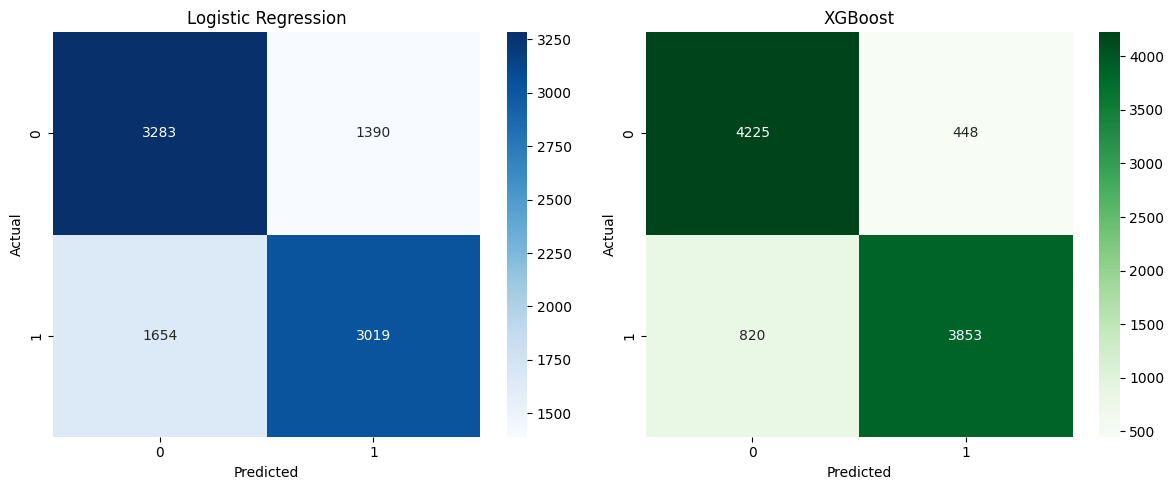

In [8]:
# Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title("Logistic Regression")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', ax=ax[1], cmap='Greens')
ax[1].set_title("XGBoost")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

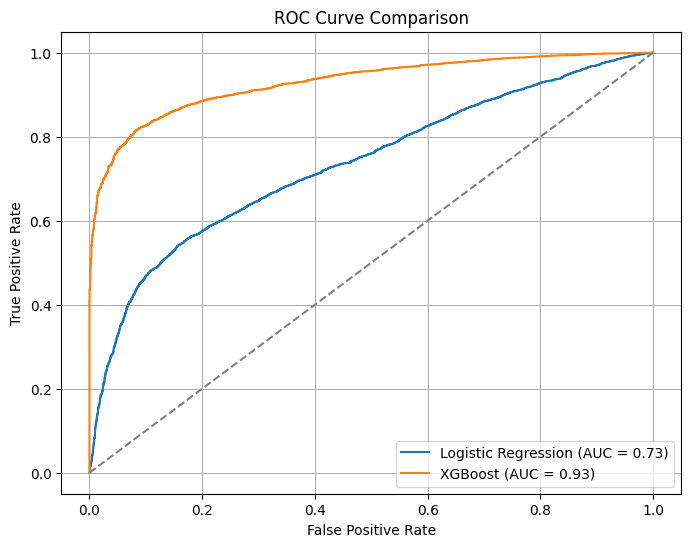

In [10]:
# 📊 ROC Curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

<!-- # Add ELI5 Explanation (Global + Local) -->

In [ ]:
# # 🔍 ELI5: Global and Local Interpretability
# import eli5
# from eli5.sklearn import PermutationImportance
# from IPython.display import display

# # Permutation importance (global)
# perm = PermutationImportance(xgb, random_state=42).fit(X_test, y_test)

# print("📌 ELI5: Global Feature Importance")
# display(eli5.show_weights(perm, feature_names=X_test.columns.tolist()))

# # Explain a single prediction (local)
# print("📌 ELI5: Local Explanation (first instance in test set)")
# display(eli5.show_prediction(perm, X_test.iloc[0], feature_names=X_test.columns.tolist()))


<!-- # Add interpret for Interactive LIME Explanations -->

In [ ]:
# # 🧠 INTERPRET: Local explanations with LIME
# from interpret.blackbox import LimeTabular
# from interpret import show

# lime = LimeTabular(predict_fn=xgb.predict_proba(X_test)[:, 1],
#                    data=X_train.values,
#                    feature_names=X_train.columns.tolist())

# lime_exp = lime.explain_local(X_test.values[:5], y_test[:5])
# show(lime_exp)
